# Twitter data

In [1]:
from tweets import TwitterData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Employment

In [3]:
# employment_data = TwitterData('Employment')
# employment_data.validate_credentials()

# start_week = 0
# end_week = 30

# for week_num in range(start_week, end_week+1,1):
    
#     try:
#         employment_data.get_one_week(week_num)
#         print("Got week {}".format(week_num))
#     except:
#         print("Failed to get week #{}".format(week_num))
#         continue
        
#     employment_data.export_one_week()
#     print("Exported week {}".format(week_num))

In [2]:
emp_df, emp_logs = TwitterData.load_all('Employment')

# Cleaning.

Getting rid of useless columns, obviously missing/useless observations.

## Logs

* We don't really need and of the requestParams.
* We also don't need sessionRequestCounter, totalRequests, and periodCovered.

In [3]:
emp_logs.head()

,weekStart,weekEnd,oldest,mostRecent,periodCovered,sessionRequestCounter,totalRequests,totalTweets,totalTweetsOverall,timeTaken,timeTakenTotal,requestParams.query,requestParams.max_results,requestParams.start_time,requestParams.end_time,requestParams.tweet.fields,requestParams.expansions,requestParams.next_token
weekNum,,,,,,,,,,,,,,,,,,
0,2020-10-19,2020-10-26,2020-10-19 00:02:06,2020-10-25 23:59:23,"6 days, 23:57:17",12,12,5829,5829,25.97,25.97,(jobs OR employment) -is:retweet lang:en place...,500,2020-10-19T00:00:00Z,2020-10-26T00:00:00Z,"id,created_at,text,public_metrics,lang,geo,source",geo.place_id,b26v89c19zqg8o3fos8vqaf8p6d3aj32bc7vs38hefu65
1,2020-10-26,2020-11-02,2020-10-26 00:00:54,2020-11-01 23:59:39,"6 days, 23:58:45",23,35,5112,10941,23.31,49.28,(jobs OR employment) -is:retweet lang:en place...,500,2020-10-26T00:00:00Z,2020-11-02T00:00:00Z,"id,created_at,text,public_metrics,lang,geo,source",geo.place_id,b26v89c19zqg8o3fosbs540vmz18fbeqy6u7az6jjp8xp
2,2020-11-02,2020-11-09,2020-11-02 00:02:39,2020-11-08 23:58:04,"6 days, 23:55:25",36,71,6008,16949,28.56,77.84,(jobs OR employment) -is:retweet lang:en place...,500,2020-11-02T00:00:00Z,2020-11-09T00:00:00Z,"id,created_at,text,public_metrics,lang,geo,source",geo.place_id,b26v89c19zqg8o3fosbtea6ha8vey9badxfwyc75c1enx
3,2020-11-09,2020-11-16,2020-11-09 00:00:42,2020-11-15 23:59:41,"6 days, 23:58:59",46,117,4663,21612,21.48,99.32,(jobs OR employment) -is:retweet lang:en place...,500,2020-11-09T00:00:00Z,2020-11-16T00:00:00Z,"id,created_at,text,public_metrics,lang,geo,source",geo.place_id,b26v89c19zqg8o3fosbu909nc33ita8bnhr63glk9zq7x
4,2020-11-16,2020-11-23,2020-11-16 00:05:49,2020-11-22 23:53:57,"6 days, 23:48:08",56,173,4725,26337,21.93,121.25,(jobs OR employment) -is:retweet lang:en place...,500,2020-11-16T00:00:00Z,2020-11-23T00:00:00Z,"id,created_at,text,public_metrics,lang,geo,source",geo.place_id,b26v89c19zqg8o3fosbvi8lrm44sl30ji5grmh9hs5g1p


In [4]:
def clean_logs(logs_df):
    
    cldf = logs_df.drop(['sessionRequestCounter', 
                 'totalRequests',
                 'periodCovered',
                 'requestParams.query',
                 'requestParams.max_results',
                 'requestParams.start_time',
                 'requestParams.end_time',
                 'requestParams.tweet.fields',
                 'requestParams.expansions',
                 'requestParams.next_token'],
                axis = 1)
    
    return cldf

emp_logs_clean = clean_logs(emp_logs)
logs_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Twitter/Raw/Aggregate/emp_logs.csv'
emp_logs_clean.to_csv(logs_path, index = True, header = True)

## Raw data (30 weeks)

* lang:
    * 38 tweets are marked as not being 'en', but looking at the actual tweets they are in english.
    * remove 'lang'
* don't need any of the geo stuff with the exception of 'full_name'.
* full_name:
    * missing in 75413 of tweets (~51%).
* rename stuff so it makes more sense:
    * public_metrics.bla -> bla
    * full_name -> loc

In [5]:
def clean_df_1a(df):
    
    cdf = df.drop([
        'lang',
        'geo.place_id',
        'geo.coordinates.type',
        'geo.coordinates.coordinates'
                  ],axis =1)
    
    cdf = cdf.rename(columns =
        {
            'public_metrics.retweet_count':'retweet_count',
            'public_metrics.reply_count':'reply_count',
            'public_metrics.like_count':'like_count',
            'public_metrics.quote_count':'quote_count',
            'full_name':'location'
        }
    
    )
    
    return cdf

clean_emp_df = clean_df_1a(emp_df)
df_path = '/Volumes/Survey_Social_Media_Compare/Methods/Data/Twitter/Raw/Aggregate/emp_df.csv'
clean_emp_df.to_csv(df_path, index = True, header = True)

In [7]:
emp_df.head()

,id,lang,text,source,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,geo.coordinates.type,geo.coordinates.coordinates,full_name
created_at,,,,,,,,,,,,
2020-10-25T23:59:23.000Z,1320515328955293703,en,@Gregt041 @SeanHouse90 @WPTV Let me get this s...,Twitter for iPhone,7dda05213481260c,0,2,0,0,NaN,NaN,"Gainesville, FL"
2020-10-25T23:58:50.000Z,1320515190572666882,en,@patrickbetdavid China/Jobs,Twitter for iPhone,bd46604b88949129,0,0,0,0,NaN,NaN,"Poland, OH"
2020-10-25T23:57:10.000Z,1320514772975132672,en,How I did my last fore jobs these 6 months wit...,Twitter for Android,46b149b6aa3775a2,0,0,0,0,NaN,NaN,"Mount Airy, NC"
2020-10-25T23:55:22.000Z,1320514318778052608,en,We’re looking for a talented Restaurant Manage...,CareerArc 2.0,352cf4e7314da0b4,1,0,0,0,Point,"[-97.0426293, 32.9661702]","Grapevine, TX"
2020-10-25T23:53:28.000Z,1320513842644979712,en,Was @GovWhitmer in on purchase of @HennigesCon...,Twitter for iPhone,00404cc8084d1f41,0,0,0,0,NaN,NaN,"Le Roy, IL"


In [8]:
clean_emp_df.head()

,id,text,source,retweet_count,reply_count,like_count,quote_count,location
created_at,,,,,,,,
2020-10-25T23:59:23.000Z,1320515328955293703,@Gregt041 @SeanHouse90 @WPTV Let me get this s...,Twitter for iPhone,0,2,0,0,"Gainesville, FL"
2020-10-25T23:58:50.000Z,1320515190572666882,@patrickbetdavid China/Jobs,Twitter for iPhone,0,0,0,0,"Poland, OH"
2020-10-25T23:57:10.000Z,1320514772975132672,How I did my last fore jobs these 6 months wit...,Twitter for Android,0,0,0,0,"Mount Airy, NC"
2020-10-25T23:55:22.000Z,1320514318778052608,We’re looking for a talented Restaurant Manage...,CareerArc 2.0,1,0,0,0,"Grapevine, TX"
2020-10-25T23:53:28.000Z,1320513842644979712,Was @GovWhitmer in on purchase of @HennigesCon...,Twitter for iPhone,0,0,0,0,"Le Roy, IL"


## Vaccination

In [25]:
# vaccination_data = TwitterData('Vaccination')
# vaccination_data.validate_credentials()

# start_week = 0
# end_week = 30

# for week_num in range(start_week, end_week+1,1):
    
#     try:
#         vaccination_data.get_one_week(week_num)
#     except:
#         print("Failed to get week #{}".format(week_num))
#         continue
        
#     vaccination_data.export_one_week()
    

In [3]:
vacc_df, vacc_logs = TwitterData.load_all('Vaccination')

In [4]:
vacc_df.columns

Index(['text', 'id', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'withheld.copyright',
       'withheld.country_codes', 'withheld.scope'],
      dtype='object')

In [9]:
vacc_df[vacc_df['withheld.scope'].notna()]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,withheld.copyright,withheld.country_codes,withheld.scope
created_at,,,,,,,,,
2020-11-10T16:52:32.000Z,This Tweet from @loisgriffinstan has been with...,1326206116360052742,6.0,1.0,38.0,0.0,True,['XY'],tweet


In [27]:
vacc_df = vacc_df[vacc_df.columns.drop(list(vacc_df.filter(regex='withheld.')))]

In [28]:
vacc_df[vacc_df.isna().any(axis=1)]

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count
created_at,,,,,,
2021-02-12T03:51:16.000Z,‘He did not do his job’: Biden slams Trump’s v...,1360073961762136064,NaN,NaN,NaN,NaN
0,5,0,0.0,NaN,NaN,NaN
NaN,Houston Doctor Fired for Giving Away Doses of ...,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,1361510064666923010,2021-02-16T02:57:49.000Z,0.0,0.0,0.0,NaN


In [51]:
vacc_df = vacc_df[vacc_df.index.notna()]
vacc_df = vacc_df[vacc_df.index != '0']

In [1]:
print(min(vacc_df.index))
print(max(vacc_df.index))

NameError: name 'vacc_df' is not defined

In [49]:
any(vacc_df.index == '0')

True

In [50]:
vacc_df = vacc_df[vacc_df.index != '0']

,text,id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,withheld.copyright,withheld.country_codes,withheld.scope
created_at,,,,,,,,,
0,1360073961762136064,2021-02-12T03:51:16.000Z,0.0,5.0,0.0,NaN,NaN,NaN,NaN
0,1361510064666923010,2021-02-16T02:57:49.000Z,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [40]:
strings = 0
other = 0

for i in vacc_df.index:
    if isinstance(i, str):
        strings +=1
    else:
        print(i)
        other +=1

In [41]:
strings

85064

In [42]:
other

0

(array([5., 3., 4., 5., 4., 3., 2., 3., 1., 1.]),
 array([3235. , 3531.1, 3827.2, 4123.3, 4419.4, 4715.5, 5011.6, 5307.7,
        5603.8, 5899.9, 6196. ]),
 <BarContainer object of 10 artists>)

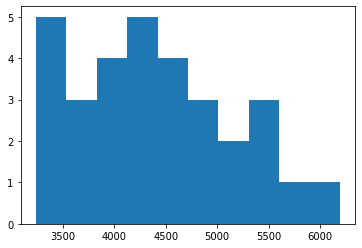

In [18]:
plt.hist(logs['totalTweets'])